In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
from sklearn.model_selection import train_test_split 

In [2]:
data = pd.read_csv('./Aqua.csv')
data.head()

,DO(ppm),pH,Temperature(*C),Salinity(ppt),TDS,Health
0,3.7,8.5,30,21.8,61,0
1,6.0,11.4,30,13.2,281,0
2,4.0,8.7,31,17.4,96,0
3,5.0,11.9,26,13.0,202,0
4,3.5,7.2,31,10.8,74,0


In [3]:
Y=data.iloc[:,5].values
print(Y)

[0 0 0 ... 1 1 1]


In [4]:
X=data
del data[data.columns[-1]]
X

,DO(ppm),pH,Temperature(*C),Salinity(ppt),TDS
0,3.7,8.5,30,21.8,61
1,6.0,11.4,30,13.2,281
2,4.0,8.7,31,17.4,96
3,5.0,11.9,26,13.0,202
4,3.5,7.2,31,10.8,74
...,...,...,...,...,...
6992,3.8,7.6,30,21.1,112
6993,3.9,8.3,29,18.3,117
6994,4.0,6.9,28,11.7,111
6995,3.5,7.3,26,25.0,180


In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=7)
Y

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

[1 1 0 ... 0 1 1]
93.0


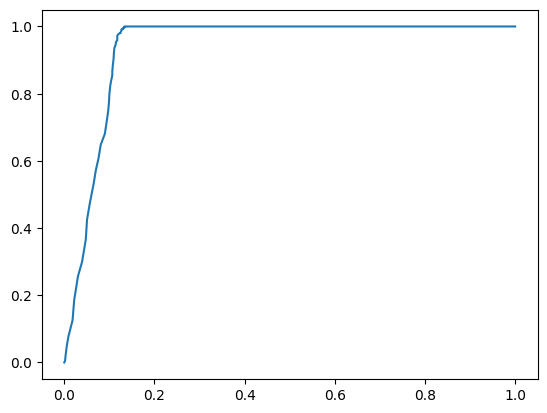

In [6]:
#RandomForest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
model=RandomForestClassifier(n_estimators=100)
model.fit(X_train,Y_train)
Y_pred= model.predict(X_test)
print(Y_pred)
RandFor_acc=accuracy_score(Y_test,Y_pred)*100
print(RandFor_acc)
y_pred_proba = model.predict_proba(X_test)[:,1]
y_pred_proba[3]
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_proba)
auc = round(metrics.roc_auc_score(Y_test, y_pred_proba),2)
plt.plot(fpr,tpr,label="RandomForest, auc="+str(auc))


[1 1 0 ... 0 1 0]
87.0


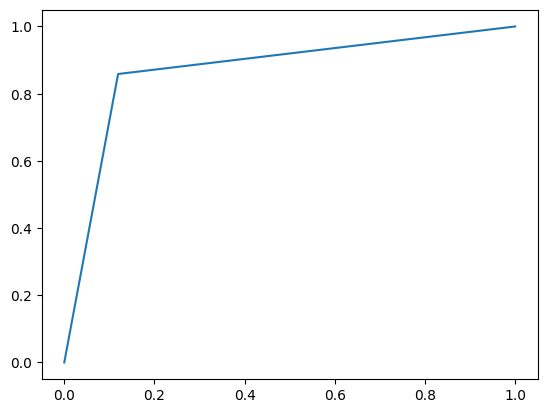

In [8]:
#decision tree
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model.fit(X_train,Y_train)
Y_pred= model.predict(X_test)
print(Y_pred)
DeciTr_acc=accuracy_score(Y_test,Y_pred)*100
print(DeciTr_acc)


y_pred_proba = model.predict_proba(X_test)[:,1]
y_pred_proba[3]
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_proba)
auc = round(metrics.roc_auc_score(Y_test, y_pred_proba),2)
plt.plot(fpr,tpr,label="DecisionTree, auc="+str(auc))



[1 1 0 ... 0 1 1]
76.52380952380953


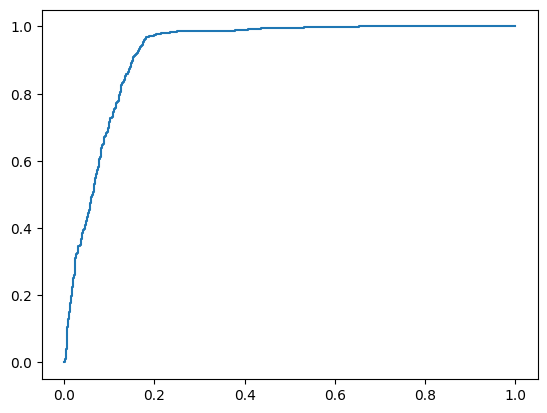

In [10]:
#GaussianNB
from sklearn.naive_bayes import GaussianNB
model= GaussianNB()
model.fit(X_train,Y_train)
# print(X_test[1])
# print(X_test)
# print(X_test[0].reshape(1,-1))

Y_pred= model.predict(X_test)
print(Y_pred)
NB_acc=accuracy_score(Y_test,Y_pred)*100
print(NB_acc)

y_pred_proba = model.predict_proba(X_test)[:,1]
y_pred_proba[3]
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_proba)
auc = round(metrics.roc_auc_score(Y_test, y_pred_proba),2)
plt.plot(fpr,tpr,label="GaussianNB, auc="+str(auc))



(4897, 5)
[0 0 1 ... 0 1 0]
56.095238095238095


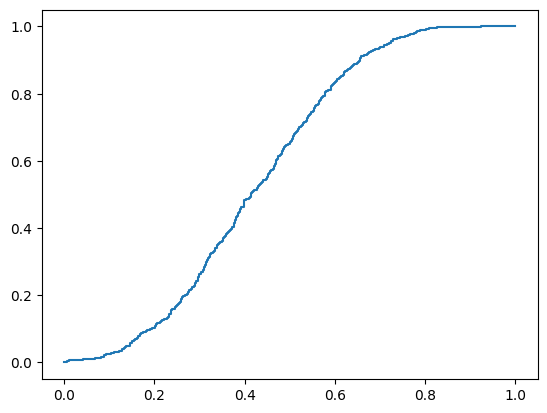

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model=LogisticRegression()
model.fit(X_train,Y_train)
print(X_train.shape)
Y_pred=model.predict(X_test)
print(Y_pred)
Logi_acc=accuracy_score(Y_test,Y_pred)*100
print(Logi_acc)

y_pred_proba = model.predict_proba(X_test)[:,1]
y_pred_proba[3]
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_proba)
auc = round(metrics.roc_auc_score(Y_test, y_pred_proba),2)
plt.plot(fpr,tpr,label="LogisticRegression, auc="+str(auc))




92.95238095238095


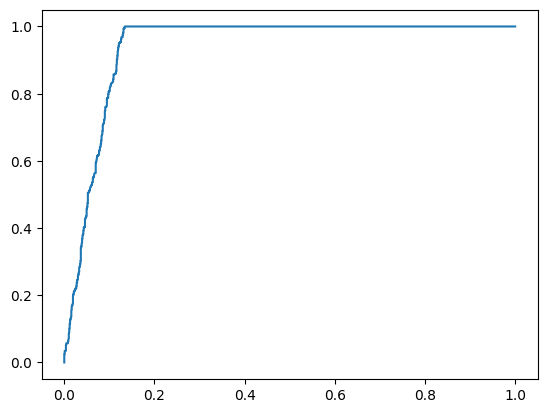

In [12]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
# from sklearn.metrics import plot_confusion_matrix
model = AdaBoostClassifier(n_estimators=99,learning_rate=1)
model.fit(X_train,Y_train)
Y_pred=model.predict(X_test)
ada_acc=accuracy_score(Y_test,Y_pred)*100
print(ada_acc)
# plot_confusion_matrix(model, X_test, Y_test) 

y_pred_proba = model.predict_proba(X_test)[:,1]
y_pred_proba[3]
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_proba)
auc = round(metrics.roc_auc_score(Y_test, y_pred_proba),2)
plt.plot(fpr,tpr,label="AdaBoost, auc="+str(auc))




[1 1 0 ... 0 1 1]
90.71428571428571


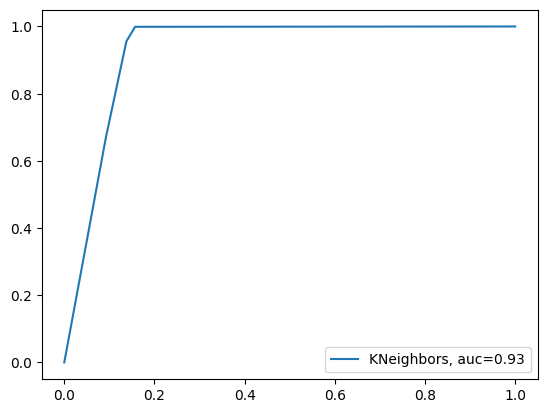

In [14]:

#KNN
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=3)
model.fit(X_train,Y_train)
Y_pred=model.predict(X_test)
print(Y_pred)
KNN_acc=accuracy_score(Y_test,Y_pred)*100
print(KNN_acc)


y_pred_proba = model.predict_proba(X_test)[:,1]
y_pred_proba[3]
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_proba)
auc = round(metrics.roc_auc_score(Y_test, y_pred_proba),2)
plt.plot(fpr,tpr,label="KNeighbors, auc="+str(auc))
plt.legend(loc=4)
plt.show()



[1 1 0 ... 0 1 1]
[1 1 0 ... 0 1 0]
[1 1 0 ... 0 1 1]
(4897, 5)
[0 0 1 ... 0 1 0]
56.095238095238095
92.95238095238095
[1 1 0 ... 0 1 1]


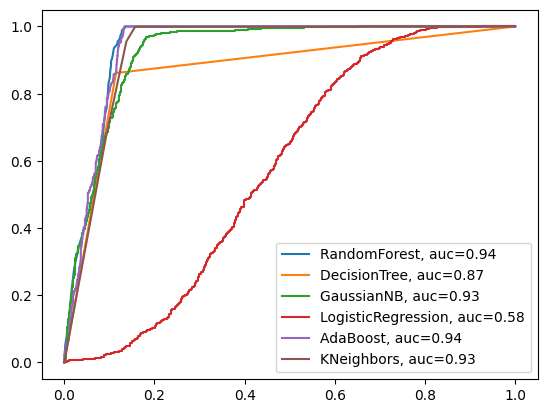

In [15]:
#RandomForest
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=100)
model.fit(X_train,Y_train)
Y_pred= model.predict(X_test)
print(Y_pred)
RandFor_acc=accuracy_score(Y_test,Y_pred)*100
RandFor_acc

y_pred_proba = model.predict_proba(X_test)[:,1]
y_pred_proba[3]
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_proba)
auc = round(metrics.roc_auc_score(Y_test, y_pred_proba),2)
plt.plot(fpr,tpr,label="RandomForest, auc="+str(auc))


#decision tree
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model.fit(X_train,Y_train)
Y_pred= model.predict(X_test)
print(Y_pred)
DeciTr_acc=accuracy_score(Y_test,Y_pred)*100
DeciTr_acc


y_pred_proba = model.predict_proba(X_test)[:,1]
y_pred_proba[3]
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_proba)
auc = round(metrics.roc_auc_score(Y_test, y_pred_proba),2)
plt.plot(fpr,tpr,label="DecisionTree, auc="+str(auc))



#Naive bayes
from sklearn.naive_bayes import GaussianNB
model= GaussianNB()
model.fit(X_train,Y_train)
# print(X_test[1])
# print(X_test)
# print(X_test[0].reshape(1,-1))

Y_pred= model.predict(X_test)
print(Y_pred)
NB_acc=accuracy_score(Y_test,Y_pred)*100
NB_acc

y_pred_proba = model.predict_proba(X_test)[:,1]
y_pred_proba[3]
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_proba)
auc = round(metrics.roc_auc_score(Y_test, y_pred_proba),2)
plt.plot(fpr,tpr,label="GaussianNB, auc="+str(auc))




from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model=LogisticRegression()
model.fit(X_train,Y_train)
print(X_train.shape)
Y_pred=model.predict(X_test)
print(Y_pred)
Logi_acc=accuracy_score(Y_test,Y_pred)*100
print(Logi_acc)

y_pred_proba = model.predict_proba(X_test)[:,1]
y_pred_proba[3]
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_proba)
auc = round(metrics.roc_auc_score(Y_test, y_pred_proba),2)
plt.plot(fpr,tpr,label="LogisticRegression, auc="+str(auc))




from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
# from sklearn.metrics import plot_confusion_matrix
model = AdaBoostClassifier(n_estimators=99,learning_rate=1)
model.fit(X_train,Y_train)
Y_pred=model.predict(X_test)
ada_acc=accuracy_score(Y_test,Y_pred)*100
print(ada_acc)
# plot_confusion_matrix(model, X_test, Y_test) 

y_pred_proba = model.predict_proba(X_test)[:,1]
y_pred_proba[3]
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_proba)
auc = round(metrics.roc_auc_score(Y_test, y_pred_proba),2)
plt.plot(fpr,tpr,label="AdaBoost, auc="+str(auc))




#KNN
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=3)
model.fit(X_train,Y_train)
Y_pred=model.predict(X_test)
print(Y_pred)
KNN_acc=accuracy_score(Y_test,Y_pred)*100
KNN_acc


y_pred_proba = model.predict_proba(X_test)[:,1]
y_pred_proba[3]
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_proba)
auc = round(metrics.roc_auc_score(Y_test, y_pred_proba),2)
plt.plot(fpr,tpr,label="KNeighbors, auc="+str(auc))
plt.legend(loc=4)
plt.show()


In [17]:
# all models with accuracy score

models=pd.DataFrame({'Models':['Logistic Regression','KNeighbor Classifier','GaussianNB','Random-Forest Classifier','DecisionTreeClassifier'],
                     'Accuracy score':[Logi_acc,KNN_acc,NB_acc,RandFor_acc,DeciTr_acc]})
models.sort_values(by="Accuracy score",ascending=False)

,Models,Accuracy score
3,Random-Forest Classifier,93.000000
1,KNeighbor Classifier,90.714286
4,DecisionTreeClassifier,87.380952
2,GaussianNB,76.523810
0,Logistic Regression,56.095238


[1 1 0 ... 0 1 1]
92.9047619047619


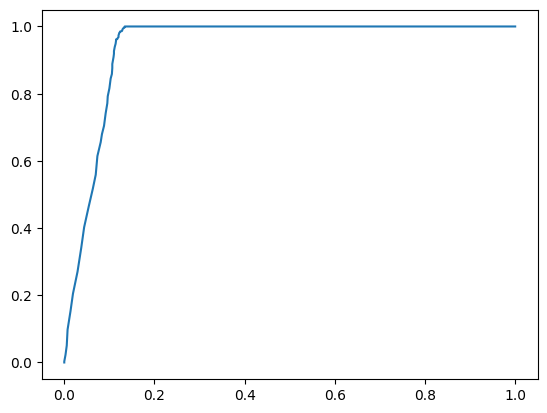

In [20]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=100)
model.fit(X_train,Y_train)
Y_pred= model.predict(X_test)
print(Y_pred)
RandFor_acc=accuracy_score(Y_test,Y_pred)*100
print(RandFor_acc)

y_pred_proba = model.predict_proba(X_test)[:,1]
y_pred_proba[3]
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_proba)
auc = round(metrics.roc_auc_score(Y_test, y_pred_proba),2)
plt.plot(fpr,tpr,label="RandomForest, auc="+str(auc))



In [18]:
from joblib import dump

In [22]:
dump(model, './savedmodels/model.joblib')

['./savedmodels/model.joblib']